# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/Users/andreafung/Dropbox/Springboard/unit 6'

In [3]:
os.listdir()

['.DS_Store',
 'Big Mountain Problem Statement Andrea Fung.pptx',
 '1588204790_GuidedCapstoneStep6HL.ipynb.zip',
 '1583439433_EDA_Cheat_Sheet_.pdf',
 'data_wrangling',
 'Guided Capstone Project Report.docx',
 'GuidedCapstoneStep6HL_ORIGINAL.ipynb',
 'GuidedCapstoneStep6HL.ipynb',
 'Pandas_Cheat_Sheet.pdf',
 '.ipynb_checkpoints',
 'Problem_Statement_Worksheet_BIG MOUNTAIN.pptx',
 '~$ided Capstone Project Report.docx',
 '1583443865_Guided_Capstone_Step_1__Problem_Identification_-_Google_Docs.pdf']

In [4]:
path="/Users/andreafung/Dropbox/Springboard/github/GuidedCapstone"
os.chdir(path)

In [5]:
os.getcwd()

'/Users/andreafung/Dropbox/Springboard/github/GuidedCapstone'

In [6]:
df=pd.read_csv('Data/step3_output.csv', index_col=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 329
Data columns (total 26 columns):
Name                 322 non-null object
state                322 non-null object
summit_elev          322 non-null int64
vertical_drop        322 non-null int64
trams                322 non-null int64
fastEight            322 non-null float64
fastSixes            322 non-null int64
fastQuads            322 non-null int64
quad                 322 non-null int64
triple               322 non-null int64
double               322 non-null int64
surface              322 non-null int64
total_chairs         322 non-null int64
Runs                 322 non-null float64
TerrainParks         322 non-null float64
LongestRun_mi        322 non-null float64
SkiableTerrain_ac    322 non-null float64
Snow Making_ac       322 non-null float64
daysOpenLastYear     322 non-null float64
yearsOpen            322 non-null float64
averageSnowfall      322 non-null float64
AdultWeekday         322 non-null f

## Fit Models with Training Dataset

In [8]:
df.head(3)

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1


**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### <font color="blue"> Create Dummy features and categorical variables 
    Since we are not using states in our model. I will not create the dummy variables and change the characteristics

In [9]:
df_ns=df.drop(['state'], axis=1, inplace=False)

#### <font color='blue'> Standardize the magnitude of numeric features

In [10]:
from sklearn import preprocessing 

In [11]:
#Declare an explanatory variable, called X 
X=df_ns.drop(['Name','AdultWeekend'], axis=1)

#Declare a response variable
y= df_ns.AdultWeekend

In [12]:
# Use the StandardScaler() methohd of preprocessign package
scaler=preprocessing.StandardScaler().fit(X)

#Declare a variable called X_scaled with the transformed s
X_scaled=scaler.transform(X)

#### Best Model 
##### <font color="blue"> Model 2
    The best model for the options given is the second model.  Where we took the states out because the owner can not change the location of the resort.  I believe elevation can be changed if there is space on the mountain, it would depend on how much land Big Mountain owns and if there are any ski runs possible above the elevation it currently has.  When taking the Summit Elevation and Base Elevation our model's mean absolute error raised and our explained variance lowered.  Which means that the distance from our predicted value's variance isn't drastically variable within our data set and our predicted value vs our true value's difference average mean is higher than when we used summit elevation.  

##### <font color="blue">Train Test split</font>
First I will train test split to show that the model is a viable option.  

Then I will run the model through the data set splitting it from all the resorts that is not Big Mountain vs Big Mountain.
1. create model with All data minus Big Mountain
2. Fit model to all data minus big Mountain
3. Predict Big Mountain Values
4. Create dataframe with predicted values and actual values for big mountain. as well as analytical results


In [13]:
from sklearn.model_selection import train_test_split

# get the 1 dimensional flattend array for our response variable y
y=y.ravel()

#called ht train test split function
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, 
                                                  test_size= 0.25, 
                                                 random_state=1)

In [14]:
#import model and evaluation
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error

#### <font color="blue"> Model Creation </font>

In [15]:
#fit linear regression model
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)

#### <font color="blue"> Prediction </font>

In [16]:
# prediction on the train test split
y_pred=lm.predict(X_test)
y_pred

array([106.158189  ,  81.8658757 ,  65.54536319,  40.06613239,
        28.38348139,  54.66927781,  58.25892088,  87.66684486,
        -1.07525586,  60.82007765,  49.0950032 , 116.7527035 ,
        83.24756882,  59.370864  ,  58.25819091,  81.9294818 ,
        57.14756688,  64.79793294,  70.1265693 ,  36.33609569,
        54.2626994 ,  28.50973844,  75.3213823 ,  78.7893615 ,
        59.77810926,  45.71842026,  60.4419651 ,  60.25187728,
        87.19171547,  58.24101391,  34.93535712,  63.99893999,
        58.8666914 ,  73.28597771,  65.29816886,  42.61118947,
        38.11060852,  60.92798307, 175.47338325,  85.97486206,
        60.38784406,  64.89754941,  79.81156708,  33.91783475,
        42.66965132,  45.71333633,  69.42308822,  88.19931808,
        36.5483826 ,  43.05141456,  41.91489548,  35.85327476,
        65.69512642,  60.43161   ,  38.55574127,  78.1604351 ,
        62.78618974,  98.05875008,  82.127721  ,  47.44969404,
        59.7134522 ,  45.6097889 , 108.42886028,  63.45

<font color="blue"> Mapping predicted values back into our original dataset

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

<font color="blue"> preparing Big Mountain for prediction

In [17]:
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0


In [18]:
ac=df[df['Name'].str.contains('Big Mountain')]

In [19]:
x_bigmount=df[df['Name'].str.contains('Big Mountain')]

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [20]:
from sklearn import preprocessing
X_pre=x_bigmount.drop(['Name','AdultWeekend','state'],axis=1)
y= x_bigmount.AdultWeekend
scaler=preprocessing.StandardScaler().fit(X_pre)
X_scaled=scaler.transform(X_pre)

In [21]:
y=y.ravel()

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [22]:
y_pred_bigmount=lm.predict(X_scaled)

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [23]:
print(y_pred_bigmount)

[63.93949153]


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

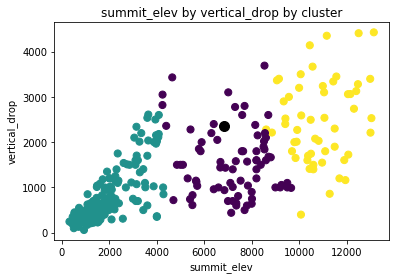

In [24]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

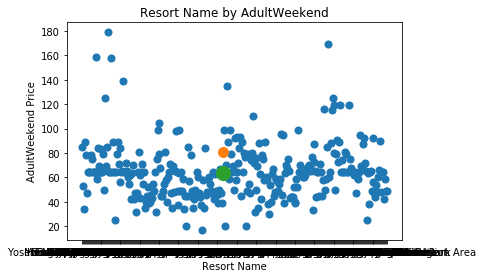

In [25]:
plt.scatter(df['Name'],df['AdultWeekend'],s=50, cmap='viridis')
plt.scatter(ac['Name'], ac['AdultWeekend'], s=100)
plt.scatter(ac['Name'],y_pred_bigmount, s=200)
plt.xlabel('Resort Name')
plt.ylabel('AdultWeekend Price')
plt.title('Resort Name by AdultWeekend')
plt.savefig('figures/fig2.png',bbox_inches='tight')

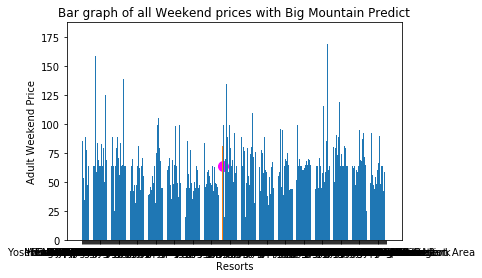

In [26]:
plt.bar(df['Name'],df['AdultWeekend'])
plt.bar(ac['Name'],ac['AdultWeekend'])
plt.scatter(ac['Name'],y_pred_bigmount,s=100,c='magenta')
plt.xlabel('Resorts')
plt.ylabel('Adult Weekend Price')
plt.title('Bar graph of all Weekend prices with Big Mountain Predict')
plt.savefig('figures/fig3bar.png',bbox_inches='tight')

<BarContainer object of 322 artists>

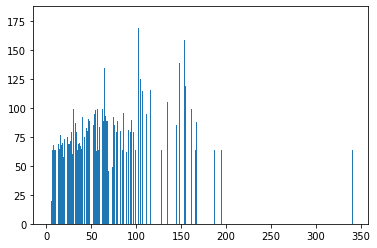

In [44]:
plt.bar(df['Runs'],df['AdultWeekend'])

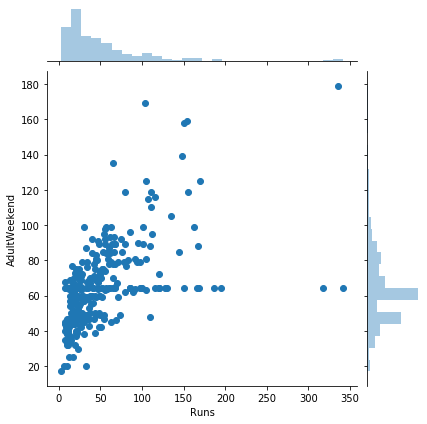

In [48]:
sns.jointplot(df['Runs'],df['AdultWeekend'])

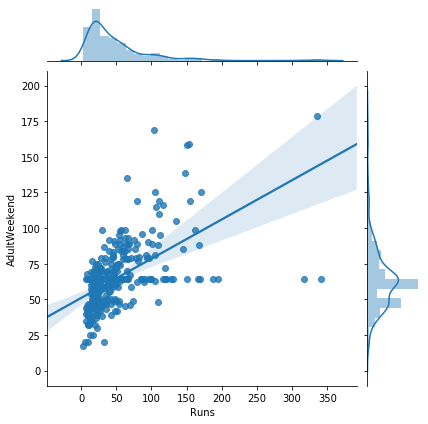

In [49]:
sns.jointplot(df['Runs'],df['AdultWeekend'], kind='reg')

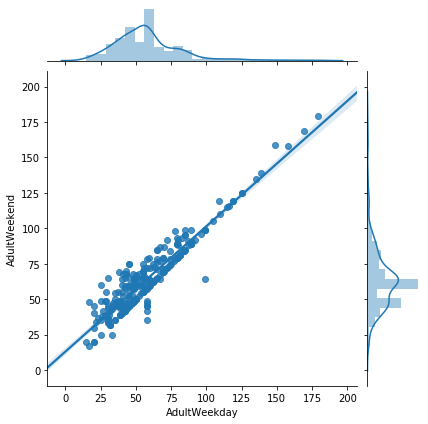

In [51]:
sns.jointplot(df['AdultWeekday'],df['AdultWeekend'], kind='reg')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [35]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [36]:
pd.DataFrame(abs(lm.coef_),X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'],ascending=False).head(12)

,Coefficient
AdultWeekday,20.045665
yearsOpen,2.866228
SkiableTerrain_ac,2.408945
Runs,1.874827
surface,1.642225
quad,1.467048
fastQuads,1.383105
triple,1.246224
daysOpenLastYear,1.210360
vertical_drop,1.175018


In [37]:
explained_variance_score(y_test,y_pred)

0.8185321601194369

In [38]:
mean_absolute_error(y_test,y_pred)

5.840140700079968

In [39]:
edf=pd.DataFrame()
edf['Explained Variance']=explained_variance_score(y_test,y_pred)
edf['Mean Absolute Error']=mean_absolute_error(y_test,y_pred)

In [40]:
edf

,Explained Variance,Mean Absolute Error


In [41]:
lm.score(X_test, y_test)

0.8130092861851799

In [52]:
ac['AdultWeekend']

151    81.0
Name: AdultWeekend, dtype: float64